## Introduction

The aim of these labs is to introduce you to data visualization with Python as concrete and as consistent as possible. 
Speaking of consistency, because there is no *best* data visualization library avaiblable for Python - up to creating these labs - we have to introduce different libraries and show their benefits when we are discussing new visualization concepts. Doing so, we hope to make students well-rounded with visualization libraries and concepts so that they are able to judge and decide on the best visualitzation technique and tool for a given problem _and_ audience.


**Note**: The majority of the plots and visualizations will be generated using data stored in *pandas* dataframes. Therefore, in this lab, we provide a brief crash course on *pandas*

------------

## Table of Contents

<div class="alert alert-block" style="margin-top: 20px">

1. [Exploring Datasets with *pandas*](#0)<br>
1.1 [The Dataset: Immigration to Canada from 1980 to 2013](#2)<br>
1.2 [*pandas* Basics](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3. [Line Plots](#12)
</div>
<hr>

# Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/):
>*pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

The course heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and  familizare yourself with the *pandas* API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html.

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.


For sake of simplicity, Canada's immigration data has been extracted and uploaded to one of IBM servers. You can fetch the data from [here](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx).

---

## *pandas* Basics<a id="4"></a>

The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Now we are ready to read in our data.

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [ ]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [ ]:
df_can.tail()

When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [ ]:
df_can.info()

To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [ ]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [ ]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Note: The default type of index and columns is NOT list.

In [ ]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.

In [ ]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [ ]:
# size of dataframe (rows, columns)
df_can.shape   

(195, 43)

Note: The main types stored in *pandas* objects are *float*, *int*, *bool*, *datetime64[ns]* and *datetime64[ns, tz] (in >= 0.17.0)*, *timedelta[ns]*, *category (in >= 0.15.0)*, and *object* (string). In addition these dtypes have item sizes, e.g. int64 and int32. 

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [ ]:
df_can.sum(axis=1)

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Length: 195, dtype: int64

In [ ]:
df_can['Total'] = df_can.sum()
df_can.head()

We can check to see how many null objects we have in the dataset as follows:

In [ ]:
df_can.isnull().sum()

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [ ]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python 
    df[['column 1', 'column 2']] 
        (returns dataframe)
```
---

Example: Let's try filtering on the list of countries ('Country').

In [ ]:
df_can.Country  # returns a series

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.

In [ ]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

### Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

In [ ]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [ ]:
df_can.head(3)

In [ ]:
# optional: to remove the name of the index
df_can.index.name = None
df_can.head()

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985

In [ ]:
# 1. the full row data (all columns)
print(df_can.loc['Japan'])

In [ ]:
# alternate methods
print(df_can.iloc[87])

In [ ]:
print(df_can[df_can.index == 'Japan'].T.squeeze()) # unusual way of doing things

In [ ]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982
982


In [ ]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]]) # not preferred

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [ ]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [ ]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

### Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. 

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [ ]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

In [ ]:
# 2. pass this condition into the dataFrame
df_can[condition]

In [ ]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,1,0,1,0,1,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,6,13,4,23,29,32,40,31,66,132,155,104,157,236,272,363,313,404,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Before we proceed: let's review the changes we have made to our dataframe.

In [ ]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
# filter logic
fil1 = df_can['Continent'] == 'Europe'

In [ ]:
fil2 = df_can['Region'] =='Southern Europe'

In [ ]:
df_south_europe = df_can[fil1 & fil2]

In [ ]:
df_south_europe[df_south_europe['Total']>=10000]

In [ ]:
df_south_europe.iloc[::2] # even rows

---
# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. 


Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [ ]:
import matplotlib as mpl # not neccessary
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.

In [ ]:
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


*optional: apply a style to Matplotlib.

In [ ]:
print(plt.style.available)
mpl.style.use(['seaborn']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.

In [ ]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

In [ ]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type *string*. Therefore, let's change the type of the index values to *integer* for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

In [ ]:
# haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.

In [ ]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(25, 6000, '2010\nEarthquake') # see note below
plt.text(12,4000,"some thing\nhappened")
plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```
    We will cover advanced annotation methods in later modules.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### type your answer here

df_yes_u_can = df_can.loc[['India','China'],years]
df_yes_u_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Double-click __here__ for the solution.
<!-- The correct answer is:

```
# This is formatted as code
```


df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()
-->

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [ ]:
### type your answer here

df_yes_u_can.plot(kind='line')

 Double-click __here__ for the solution.
<!-- The correct answer is:
df_CI.plot(kind='line')
-->

That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [ ]:
df_ai = df_can[(df_can.index =='Algeria') | (df_can.index=='Italy')]
df_ai[years].T.plot()

In [ ]:
df_ai.T # df_ai.transpose()

*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

Text(0.5, 0, 'Years')

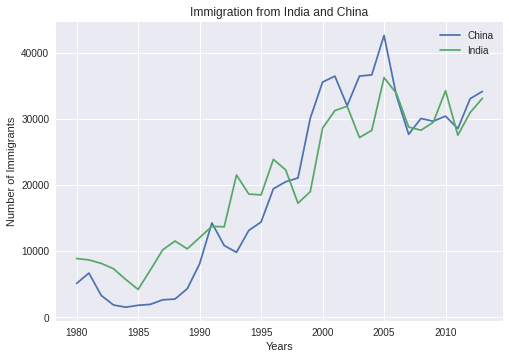

In [ ]:
### type your answer here
df_wow = df_can[(df_can.index=='India') | (df_can.index=='China')]
df_wow[years].T.plot()
plt.title('Immigration from India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')



Double-click __here__ for the solution.
<!-- The correct answer is:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')
-->

<!--
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
--> 

From the above plot, we can observe that the China and India have very similar immigration trends through the years. 

*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Text(0.5, 0, 'Years')

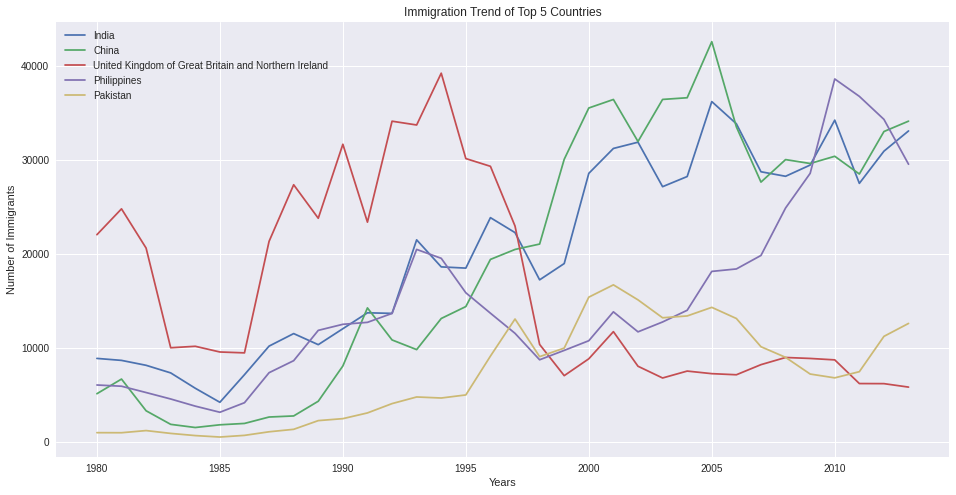

In [ ]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_yoo=df_can.head(5)
df_yoo[years].T.plot(figsize=(16, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Double-click __here__ for the solution.
<!-- The correct answer is:
\\ # Step 1: Get the dataset. Recall that we created a Total column that calculates the cumulative immigration by country. \\ We will sort on this column to get our top 5 countries using pandas sort_values() method.
\\ inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
-->

<!--
# get the top 5 entries
df_top5 = df_can.head(5)
-->

<!--
# transpose the dataframe
df_top5 = df_top5[years].transpose() 
-->

<!--
print(df_top5)
-->

<!--
\\ # Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
-->

<!--
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
-->

In [ ]:
years= [str(i) for i in range(1980, 2014)]

### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

In [ ]:
# reading a local file
u = pd.read_excel("Canada.xlsx",
            sheet_name='Canada by Citizenship',
            skiprows=range(20),
            skipfooter=2)

In [ ]:
# reading a drive file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pd.read_excel('/content/drive/My Drive/Canada.xlsx')